In [74]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD
import time
import matplotlib.pyplot as plt
from torchsummary import summary

In [75]:
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [76]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_to_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_to_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

/tmp/ipykernel_11163/1603734080.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x).float()
/tmp/ipykernel_11163/1603734080.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y).float()


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
The length of loss_history is : 100
Time cost : 0.1255486011505127


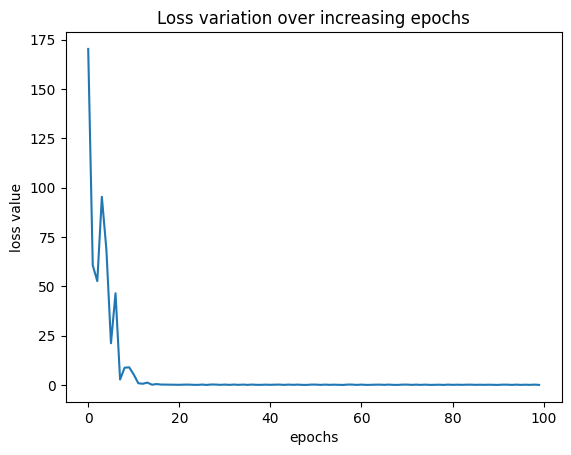

In [77]:
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

mynet = MyNeuralNet().to(device)
# for par in mynet.parameters():
#     print(par)
summary(mynet, torch.zeros(1, 2))
        
loss_func = nn.MSELoss()
opt = SGD(mynet.parameters(), lr=0.001)

loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss = loss_func(mynet(x), y)
        loss.backward()
        opt.step()
        loss_history.append(loss.item())
end = time.time()
print(f"The length of loss_history is : {len(loss_history)}")
print(f"Time cost : {end - start}")

plt.plot(loss_history)
plt.title("Loss variation over increasing epochs")
plt.xlabel("epochs")
plt.ylabel("loss value")

save_path = "course2.pth"
torch.save(mynet.state_dict(), save_path)

In [78]:
mynet = MyNeuralNet().to(device)
load_path = "course2.pth"
mynet.load_state_dict(torch.load(load_path))
val_x = [[10, 11]]
val_x = torch.tensor(val_x).float().to(device)
output = mynet(val_x)
print(output)

tensor([[20.4549]], device='cuda:0', grad_fn=<AddmmBackward0>)
